In [649]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [650]:
prof_click_datas = pd.read_csv('./trajectory/trajectory_prof.csv')
my_click_datas = pd.read_csv('./trajectory/trajectory_my_agent.csv')
opponent_click_datas = pd.read_csv('./trajectory/trajectory_opponent.csv')
moter_noise_improved_datas = pd.read_csv('./trajectory/trajectory_improve_click.csv')
visual_perception_improved_datas = pd.read_csv('./trajectory/trajectory_improve_perception.csv')

In [651]:
def extract_data(click_datas, do_print):
    click_datas.head()

    click_datas.shape

    user0 = click_datas[click_datas.user == 0]

    user0 = user0[user0.click_action == 1]
    user0 = user0.reset_index(drop=True)
    user0

#     user0.target_radius.min()

#     user0.target_radius.max()

    radius_avg = []
    fail_rate_r = []
    complete_time_r = []
    radius_start = 0.009
    radius_range = 0.002

    for i in range(8):
        radius = user0
        radius = radius[radius.target_radius >= radius_start]
        radius = radius[radius.target_radius < radius_start + radius_range]
        radius = radius.reset_index(drop=True)

        radius_avg.append(radius['target_radius'].mean()*100)
        fail_rate_r.append(100.0 - radius['click_success'].mean()*100)
        complete_time_r.append(radius['time'].mean())

        print('radius( {0:0.3f} ~ {1:0.3f} ) : average: {2:0.4f}  fail_rate: {3:0.4f}%  completion_time_mean: {4:0.4f}s'.format(radius_start, radius_start + radius_range, radius_avg[i] ,fail_rate_r[i], complete_time_r[i]))
        radius_start += radius_range
    
    corr_radius = pd.DataFrame({'radius_avg': radius_avg,
                                 'fail_rate': fail_rate_r,
                                   'complete_time': complete_time_r})

#     user0.target_speed.min()

#     user0.target_speed.max()

    print('\n------------------------------------------------------------------------------------------------------\n')

    speed_avg = []
    fail_rate_s = []
    complete_time_s = []
    speed_start = 0.00
    speed_range = 0.05

    for i in range(10):
        speed = user0
        speed = speed[speed.target_speed >= speed_start]
        speed = speed[speed.target_speed < speed_start + speed_range]
        speed = speed.reset_index(drop=True)

        speed_avg.append(speed['target_speed'].mean()*100)
        fail_rate_s.append(100.0 - speed['click_success'].mean()*100)
        complete_time_s.append(speed['time'].mean())

        print('speed( {0:0.3f} ~ {1:0.3f} ) : average: {2:0.4f}  fail_rate: {3:0.4f}%  completion_time_mean: {4:0.4f}s'.format(speed_start, speed_start + speed_range, speed_avg[i] ,fail_rate_s[i], complete_time_s[i]))
        speed_start += speed_range

    corr_speed = pd.DataFrame({'speed_avg': speed_avg,
                                 'fail_rate': fail_rate_s,
                                  'complete_time': complete_time_s})
    corr_speed
    
    if do_print == True:
        corr_radius.plot(kind='scatter', x='radius_avg', y='fail_rate')
        fit_weight = np.polyfit(corr_radius['radius_avg'], corr_radius['fail_rate'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
        trend_f = np.poly1d(fit_weight)

        plt.plot(corr_radius['radius_avg'], trend_f(corr_radius['radius_avg']),"r-")
        plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
        plt.show()
        
        corr_speed.plot(kind='scatter', x='speed_avg', y='fail_rate')
        fit_weight = np.polyfit(corr_speed['speed_avg'], corr_speed['fail_rate'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
        trend_f = np.poly1d(fit_weight)

        plt.plot(corr_speed['speed_avg'], trend_f(corr_speed['speed_avg']),"r-")
        plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
        plt.show()
    
    corr = {'radius': corr_radius, 'speed': corr_speed}
    return corr

In [652]:
def print_corr_graph(first_str, first_corr, second_str, second_corr):
    
    binnig_str = [[
                    "Target Radius Binning Completion_time,  R = {:.4f} ( y={:.2f}x + {:.2f} )",
                     "Target Radius Binning Fail_rate,  R = {:.4f} ( y={:.2f}x + {:.2f} )"
                    ],
                     [
                        "Target Speed Binning Completion_time,  R = {:.4f} ( y={:.2f}x + {:.2f} )",
                         "Target Speed Binning Fail_rate,  R = {:.4f} ( y={:.2f}x + {:.2f} )"
                     ]
                ]
    for i, binnig in enumerate(['radius', 'speed']):
        corr_complete_time = pd.DataFrame({first_str: first_corr[binnig]['complete_time'],
                                       second_str: second_corr[binnig]['complete_time']})
        radius_df = corr_complete_time.corr()
        print(radius_df)
        radius_r2 = radius_df[first_str][second_str]

        corr_complete_time.plot(kind='scatter', x=first_str, y=second_str)
        fit_weight = np.polyfit(first_corr[binnig]['complete_time'], second_corr[binnig]['complete_time'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
        trend_f = np.poly1d(fit_weight)

        plt.plot(first_corr[binnig]['complete_time'], trend_f(first_corr[binnig]['complete_time']), "r-")
        plt.title(binnig_str[i][0].format(radius_r2, fit_weight[0], fit_weight[1]))
        plt.grid()
        plt.show()

        corr_fail_rate = pd.DataFrame({first_str: first_corr[binnig]['fail_rate'],
                                       second_str: second_corr[binnig]['fail_rate']})
        speed_df = corr_fail_rate.corr()
        print(speed_df)
        speed_r2 = speed_df[first_str][second_str]

        corr_fail_rate.plot(kind='scatter', x=first_str, y=second_str)
        fit_weight = np.polyfit(first_corr[binnig]['fail_rate'], second_corr[binnig]['fail_rate'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
        trend_f = np.poly1d(fit_weight)

        plt.plot(first_corr[binnig]['fail_rate'], trend_f(first_corr[binnig]['fail_rate']), "r-")
        plt.title(binnig_str[i][1].format(speed_r2 ,fit_weight[0], fit_weight[1]))
        plt.grid()
        plt.show()
    
    return

In [653]:
# click_datas.head()

# click_datas.shape

# user0 = click_datas[click_datas.user == 0]

# user0 = user0[user0.click_action == 1]
# user0 = user0.reset_index(drop=True)
# user0

# user0.target_radius.min()

# user0.target_radius.max()

# radius_avg = []
# success_rate_r = []
# radius_start = 0.009
# radius_range = 0.002

# for i in range(8):
#     radius = user0
#     radius = radius[radius.target_radius >= radius_start]
#     radius = radius[radius.target_radius < radius_start + radius_range]
#     radius = radius.reset_index(drop=True)

#     radius_avg.append(radius['target_radius'].mean()*100)
#     success_rate_r.append(radius['click_success'].mean()*100)

#     print('radius( {0:0.3f} ~ {1:0.3f} ) : average: {2:0.4f}  success_rate: {3:0.4f}%'.format(radius_start, radius_start + radius_range, radius_avg[i] ,success_rate_r[i]))
#     radius_start += radius_range

# corr_radius = pd.DataFrame({'radius_avg': radius_avg,
#                              'success_rate': success_rate_r})
# corr_radius

# corr_radius.plot(kind='scatter', x='radius_avg', y='success_rate')
# fit_weight = np.polyfit(corr_radius['radius_avg'], corr_radius['success_rate'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
# trend_f = np.poly1d(fit_weight)
              
# plt.plot(corr_radius['radius_avg'], trend_f(corr_radius['radius_avg']),"r-")
# plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
# plt.show()

# user0.target_speed.min()

# user0.target_speed.max()

# speed_avg = []
# success_rate_s = []
# speed_start = 0.00
# speed_range = 0.05

# for i in range(10):
#     speed = user0
#     speed = speed[speed.target_speed >= speed_start]
#     speed = speed[speed.target_speed < speed_start + speed_range]
#     speed = speed.reset_index(drop=True)

#     speed_avg.append(speed['target_speed'].mean()*100)
#     success_rate_s.append(speed['click_success'].mean()*100)

#     print('speed( {0:0.3f} ~ {1:0.3f} ) : average: {2:0.4f}  success_rate: {3:0.4f}%'.format(speed_start, speed_start + speed_range, speed_avg[i] ,success_rate_s[i]))
#     speed_start += speed_range

# corr_speed = pd.DataFrame({'speed_avg': speed_avg,
#                              'success_rate': success_rate_s})
# corr_speed

# corr_speed.plot(kind='scatter', x='speed_avg', y='success_rate')
# fit_weight = np.polyfit(corr_speed['speed_avg'], corr_speed['success_rate'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
# trend_f = np.poly1d(fit_weight)
              
# plt.plot(corr_speed['speed_avg'], trend_f(corr_speed['speed_avg']),"r-")
# plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
# plt.show()

radius( 0.009 ~ 0.011 ) : average: 1.0298  fail_rate: 49.6447%  completion_time_mean: 0.9991s
radius( 0.011 ~ 0.013 ) : average: 1.2018  fail_rate: 42.9758%  completion_time_mean: 0.9382s
radius( 0.013 ~ 0.015 ) : average: 1.3997  fail_rate: 34.5025%  completion_time_mean: 0.8622s
radius( 0.015 ~ 0.017 ) : average: 1.6017  fail_rate: 29.9572%  completion_time_mean: 0.7997s
radius( 0.017 ~ 0.019 ) : average: 1.7977  fail_rate: 25.0185%  completion_time_mean: 0.7806s
radius( 0.019 ~ 0.021 ) : average: 2.0004  fail_rate: 20.6429%  completion_time_mean: 0.7383s
radius( 0.021 ~ 0.023 ) : average: 2.2008  fail_rate: 20.9373%  completion_time_mean: 0.7245s
radius( 0.023 ~ 0.025 ) : average: 2.3516  fail_rate: 15.7287%  completion_time_mean: 0.7242s

------------------------------------------------------------------------------------------------------

speed( 0.000 ~ 0.050 ) : average: 3.3483  fail_rate: 6.6298%  completion_time_mean: 0.5976s
speed( 0.050 ~ 0.100 ) : average: 7.7492  fail_rate

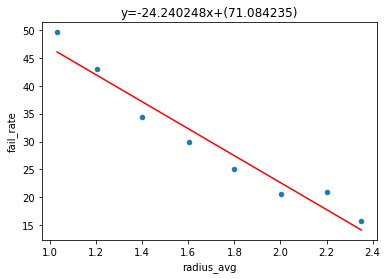

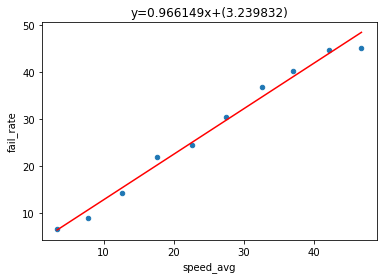

In [654]:
prof_corr = extract_data(prof_click_datas, True)

radius( 0.009 ~ 0.011 ) : average: 1.0298  fail_rate: 45.7868%  completion_time_mean: 0.9091s
radius( 0.011 ~ 0.013 ) : average: 1.2018  fail_rate: 39.5848%  completion_time_mean: 0.8673s
radius( 0.013 ~ 0.015 ) : average: 1.3997  fail_rate: 34.2162%  completion_time_mean: 0.8239s
radius( 0.015 ~ 0.017 ) : average: 1.6017  fail_rate: 29.5292%  completion_time_mean: 0.7686s
radius( 0.017 ~ 0.019 ) : average: 1.7977  fail_rate: 26.6421%  completion_time_mean: 0.7528s
radius( 0.019 ~ 0.021 ) : average: 2.0004  fail_rate: 20.8571%  completion_time_mean: 0.7079s
radius( 0.021 ~ 0.023 ) : average: 2.2008  fail_rate: 19.7279%  completion_time_mean: 0.6807s
radius( 0.023 ~ 0.025 ) : average: 2.3516  fail_rate: 18.6147%  completion_time_mean: 0.6674s

------------------------------------------------------------------------------------------------------

speed( 0.000 ~ 0.050 ) : average: 3.3483  fail_rate: 6.0773%  completion_time_mean: 0.6071s
speed( 0.050 ~ 0.100 ) : average: 7.7492  fail_rate

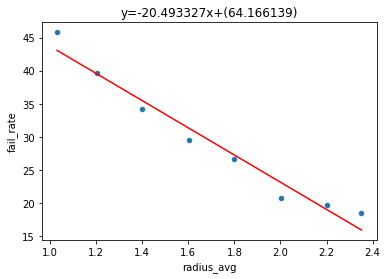

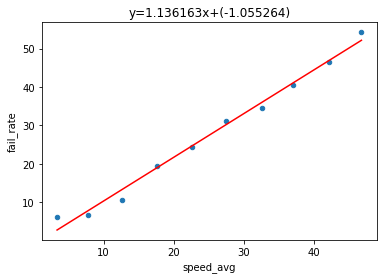

In [655]:
my_corr = extract_data(my_click_datas, True)

radius( 0.009 ~ 0.011 ) : average: 1.0298  fail_rate: 48.6294%  completion_time_mean: 0.9193s
radius( 0.011 ~ 0.013 ) : average: 1.2018  fail_rate: 42.2837%  completion_time_mean: 0.8389s
radius( 0.013 ~ 0.015 ) : average: 1.3997  fail_rate: 34.3593%  completion_time_mean: 0.8133s
radius( 0.015 ~ 0.017 ) : average: 1.6017  fail_rate: 30.4565%  completion_time_mean: 0.7643s
radius( 0.017 ~ 0.019 ) : average: 1.7977  fail_rate: 26.4207%  completion_time_mean: 0.7446s
radius( 0.019 ~ 0.021 ) : average: 2.0004  fail_rate: 24.0000%  completion_time_mean: 0.6981s
radius( 0.021 ~ 0.023 ) : average: 2.2008  fail_rate: 21.3908%  completion_time_mean: 0.6816s
radius( 0.023 ~ 0.025 ) : average: 2.3516  fail_rate: 16.7388%  completion_time_mean: 0.6634s

------------------------------------------------------------------------------------------------------

speed( 0.000 ~ 0.050 ) : average: 3.3483  fail_rate: 5.5249%  completion_time_mean: 0.5904s
speed( 0.050 ~ 0.100 ) : average: 7.7492  fail_rate

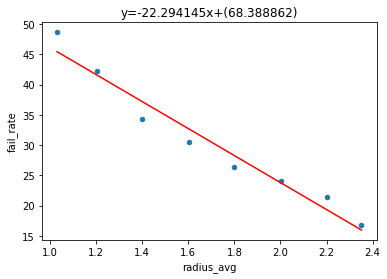

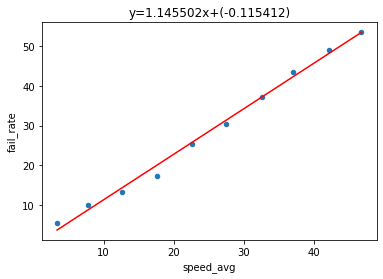

In [656]:
opponent_corr = extract_data(opponent_click_datas, True)

                             single_model  adversarial_model - agent_1
single_model                     1.000000                     0.985526
adversarial_model - agent_1      0.985526                     1.000000


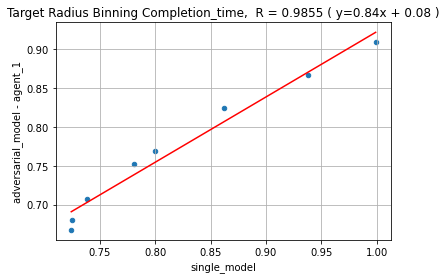

                             single_model  adversarial_model - agent_1
single_model                     1.000000                     0.992857
adversarial_model - agent_1      0.992857                     1.000000


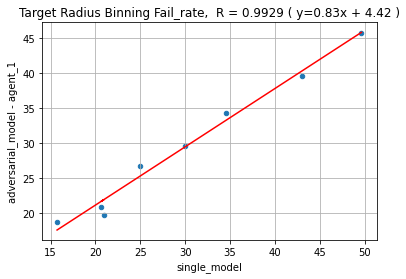

                             single_model  adversarial_model - agent_1
single_model                     1.000000                     0.969087
adversarial_model - agent_1      0.969087                     1.000000


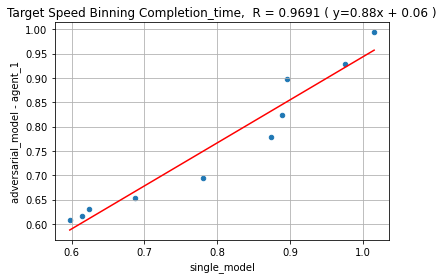

                             single_model  adversarial_model - agent_1
single_model                     1.000000                     0.985434
adversarial_model - agent_1      0.985434                     1.000000


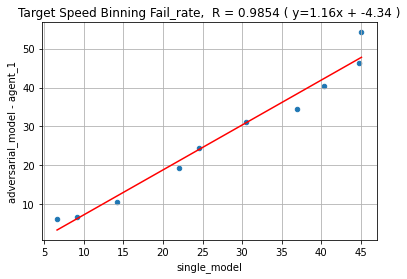

In [657]:
print_corr_graph('single_model', prof_corr, 'adversarial_model - agent_1', my_corr)

                             single_model  adversarial_model - agent_2
single_model                     1.000000                     0.983983
adversarial_model - agent_2      0.983983                     1.000000


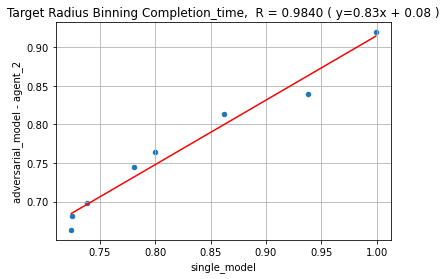

                             single_model  adversarial_model - agent_2
single_model                     1.000000                     0.996525
adversarial_model - agent_2      0.996525                     1.000000


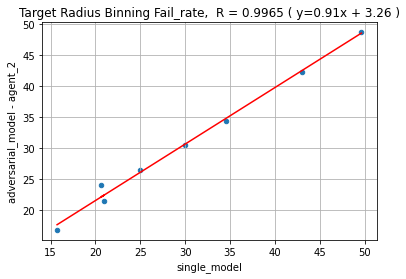

                             single_model  adversarial_model - agent_2
single_model                     1.000000                     0.942285
adversarial_model - agent_2      0.942285                     1.000000


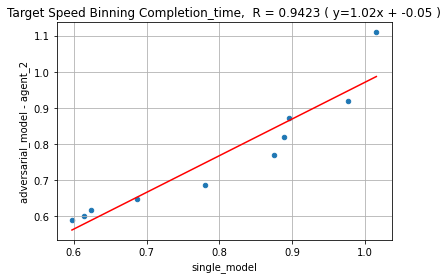

                             single_model  adversarial_model - agent_2
single_model                     1.000000                     0.988268
adversarial_model - agent_2      0.988268                     1.000000


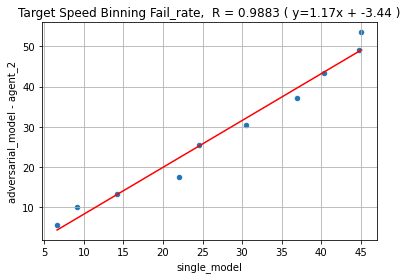

In [658]:
print_corr_graph('single_model', prof_corr, 'adversarial_model - agent_2', opponent_corr)

          agent_1   agent_2
agent_1  1.000000  0.992147
agent_2  0.992147  1.000000


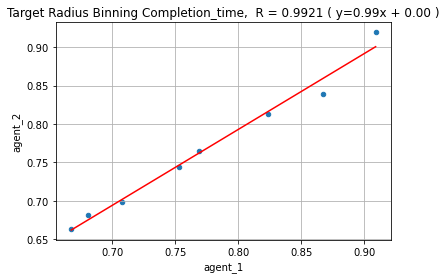

          agent_1   agent_2
agent_1  1.000000  0.989193
agent_2  0.989193  1.000000


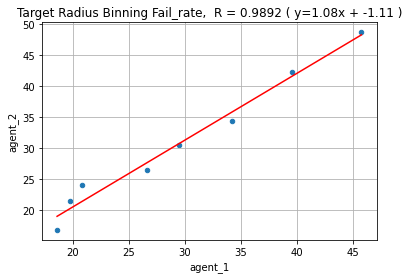

          agent_1   agent_2
agent_1  1.000000  0.979331
agent_2  0.979331  1.000000


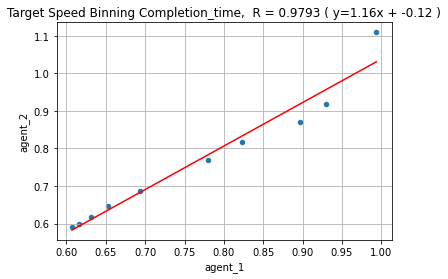

          agent_1   agent_2
agent_1  1.000000  0.993331
agent_2  0.993331  1.000000


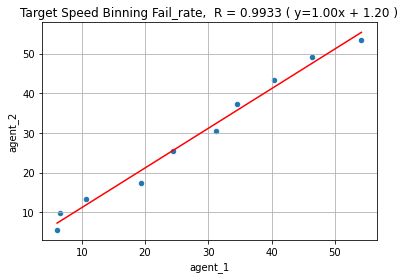

In [659]:
print_corr_graph('agent_1', my_corr, 'agent_2', opponent_corr)

radius( 0.009 ~ 0.011 ) : average: 1.0298  fail_rate: 51.6751%  completion_time_mean: 0.8853s
radius( 0.011 ~ 0.013 ) : average: 1.2018  fail_rate: 42.5606%  completion_time_mean: 0.7973s
radius( 0.013 ~ 0.015 ) : average: 1.3997  fail_rate: 36.5068%  completion_time_mean: 0.7684s
radius( 0.015 ~ 0.017 ) : average: 1.6017  fail_rate: 34.9501%  completion_time_mean: 0.7243s
radius( 0.017 ~ 0.019 ) : average: 1.7977  fail_rate: 27.3063%  completion_time_mean: 0.6989s
radius( 0.019 ~ 0.021 ) : average: 2.0004  fail_rate: 21.8571%  completion_time_mean: 0.6650s
radius( 0.021 ~ 0.023 ) : average: 2.2008  fail_rate: 20.9373%  completion_time_mean: 0.6339s
radius( 0.023 ~ 0.025 ) : average: 2.3516  fail_rate: 19.6248%  completion_time_mean: 0.6174s

------------------------------------------------------------------------------------------------------

speed( 0.000 ~ 0.050 ) : average: 3.3483  fail_rate: 11.6022%  completion_time_mean: 0.5696s
speed( 0.050 ~ 0.100 ) : average: 7.7492  fail_rat

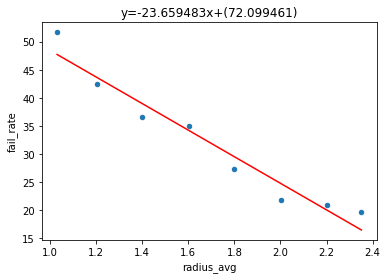

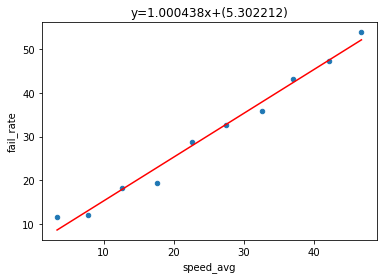

radius( 0.009 ~ 0.011 ) : average: 1.0298  fail_rate: 55.8376%  completion_time_mean: 1.0323s
radius( 0.011 ~ 0.013 ) : average: 1.2018  fail_rate: 47.6817%  completion_time_mean: 0.9346s
radius( 0.013 ~ 0.015 ) : average: 1.3997  fail_rate: 40.8733%  completion_time_mean: 0.9208s
radius( 0.015 ~ 0.017 ) : average: 1.6017  fail_rate: 32.3823%  completion_time_mean: 0.8223s
radius( 0.017 ~ 0.019 ) : average: 1.7977  fail_rate: 28.1919%  completion_time_mean: 0.7749s
radius( 0.019 ~ 0.021 ) : average: 2.0004  fail_rate: 21.9286%  completion_time_mean: 0.7161s
radius( 0.021 ~ 0.023 ) : average: 2.2008  fail_rate: 22.6002%  completion_time_mean: 0.6825s
radius( 0.023 ~ 0.025 ) : average: 2.3516  fail_rate: 19.6248%  completion_time_mean: 0.6576s

------------------------------------------------------------------------------------------------------

speed( 0.000 ~ 0.050 ) : average: 3.3483  fail_rate: 4.4199%  completion_time_mean: 0.5824s
speed( 0.050 ~ 0.100 ) : average: 7.7492  fail_rate

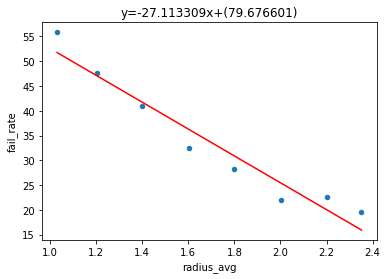

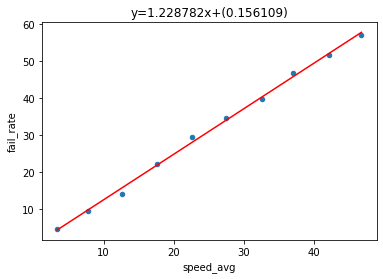

In [660]:
moter_noise_improved_corr = extract_data(moter_noise_improved_datas, True)
visual_perception_improved_corr = extract_data(visual_perception_improved_datas, True)

                                  Physical Ability Improved Agent  \
Physical Ability Improved Agent                          1.000000   
Cognitive Ability Improved Agent                         0.990782   

                                  Cognitive Ability Improved Agent  
Physical Ability Improved Agent                           0.990782  
Cognitive Ability Improved Agent                          1.000000  


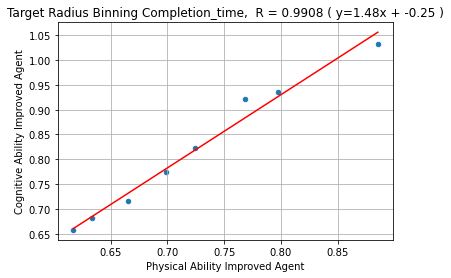

                                  Physical Ability Improved Agent  \
Physical Ability Improved Agent                          1.000000   
Cognitive Ability Improved Agent                         0.986794   

                                  Cognitive Ability Improved Agent  
Physical Ability Improved Agent                           0.986794  
Cognitive Ability Improved Agent                          1.000000  


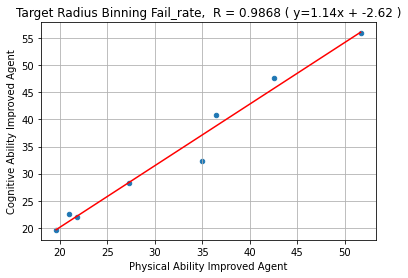

                                  Physical Ability Improved Agent  \
Physical Ability Improved Agent                          1.000000   
Cognitive Ability Improved Agent                         0.987872   

                                  Cognitive Ability Improved Agent  
Physical Ability Improved Agent                           0.987872  
Cognitive Ability Improved Agent                          1.000000  


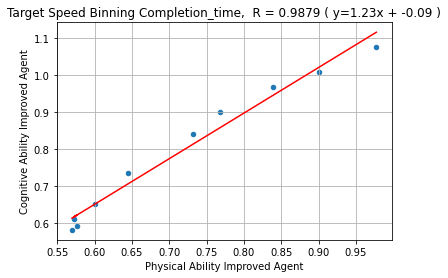

                                  Physical Ability Improved Agent  \
Physical Ability Improved Agent                          1.000000   
Cognitive Ability Improved Agent                         0.991469   

                                  Cognitive Ability Improved Agent  
Physical Ability Improved Agent                           0.991469  
Cognitive Ability Improved Agent                          1.000000  


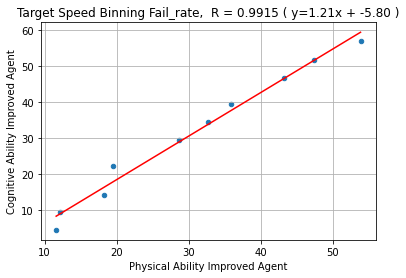

In [661]:
print_corr_graph('Physical Ability Improved Agent', moter_noise_improved_corr, 'Cognitive Ability Improved Agent', visual_perception_improved_corr)

In [662]:
datas = prof_click_datas
print(datas.target_x.min())

print(datas.target_x.max())

print(datas.target_y.min())

print(datas.target_y.max())

8.173979368410756e-06
0.4605930509083916
1.9607583089101156e-05
0.2591254658855575
